# **Hierarchical Clustering**


* Avoids the need to **decide on the number of clusters** as
in the case of K Means clustering
* Points to be clustered into groups are assigned
to **separate clusters**
* Similar ones are combined until we get a **single cluster**


# **Types of Hierarchical clustering**

1. **Agglomerative Hierarchical clustering** :

 * good at
identifying **small clusters**

2. **Divisive Hierarchical clustering** :

* good at identifying
**large clusters**
* divisive is not implimented under normal cases


# **Agglomerative Hierarchical clustering**
(Also called **additive hierarchical clustering**)
* Assign each data point to a separate cluster
* Merge the closest pair of clusters at each iteration and repeat
this until a single cluster is left

# **Divisive Hierarchical clustering**
* It works the opposite way.
* It starts with a single cluster
with all the points in it.

* **The farthest point in the cluster are split** in each iteration
until each cluster contains only a single point in it.
* The **distance** between the centroids of the clusters are
calculated to find out the points that are similar to each
other.
* Thus it is a **distance based algorithm** as in the case of K
Means clustering.
* There is a **proximity matrix** which stores the distances
between the clusters during each iteration.



# **Choosing number of clusters**
 * We use a **dendrogram** for this.
 * It is a tree-like diagram
that records the sequences of merges or splits.
* More the distance of the vertical lines in the dendrogram,
more the distance between those clusters.

* Set a threshold distance and draw a horizontal line,
generally cutting the tallest vertical line.
* The number of vertical lines being intersected by this line
gives the **number of clusters**

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dfsubset=df.loc[:,['Age','Annual Income (k$)']]

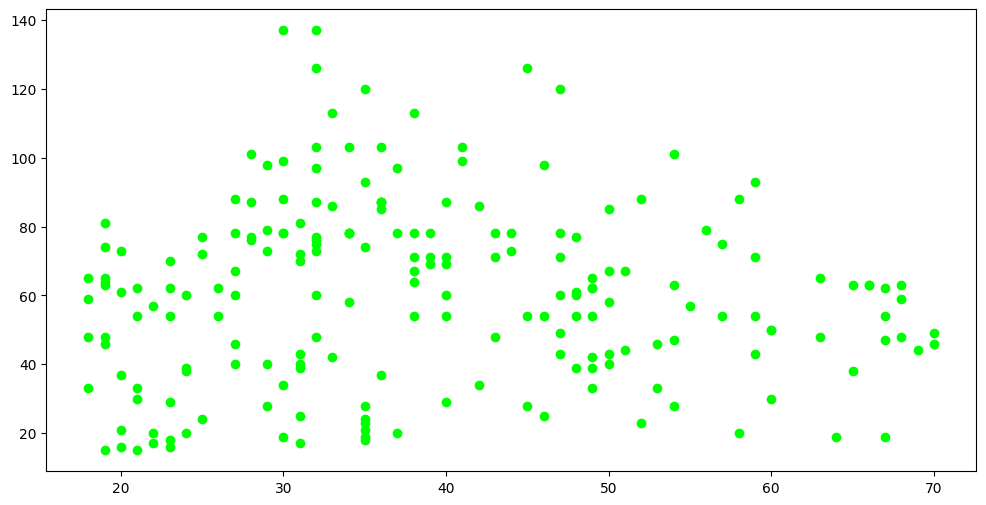

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(dfsubset[['Age']],dfsubset[['Annual Income (k$)']],c='lime')
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

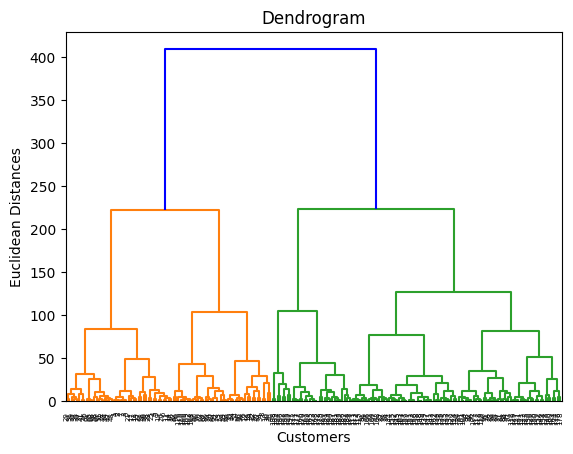

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(dfsubset,method='ward'),above_threshold_color='blue',color_threshold=250)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

# sch.linkage(dfsubset,method='ward):This performs the hierarchical clustering using Ward's method,
# which minimizes variance with clusters.
# Dendrogram helps us to decide how many clusters to select. The vertical Lines represents merging of clusters,
# The color threshold helps to see cluster divisions clearly.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cl=cluster.fit_predict(dfsubset)
cl

# AgglomerativeClustering is a bottom-up approch to clustering where data points
# starts as inmdividual clusters and merged step by step.
# n_clusters=2: We are specifying that we want to create 2 clusters.
# affinity/metric='euclidean': we are using the Eucliedean distance to measure how close orfar the data points are
# linkage='ward': Ward's method is used to minimize the variance within clusters
# fit_predict(dfsubset): This performs the clustering on the dataset and assigns
# each data point to one of the two clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(dfsubset,cl)

# silhouette_score is a metric used to evaluate how well the clustering has performed
# It ranges from -1 to 1
# If the score is close to 1 means the cluster are well seperated and dense
# if the score is near 0 means clusters overlap
# If the score leans towards negative means clusters are poorley seperated

np.float64(0.4104652474372429)

In [ ]:
dfsubset['cluster']=cl
dfsubset.head()

,Age,Annual Income (k$),cluster
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1


In [ ]:
df1=dfsubset[dfsubset['cluster']==0]
df2=dfsubset[dfsubset['cluster']==1]
df1.head()

,Age,Annual Income (k$),cluster
66,43,48,0
71,47,49,0
75,26,54,0
76,45,54,0
77,40,54,0


In [ ]:
df2.head()

,Age,Annual Income (k$),cluster
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1


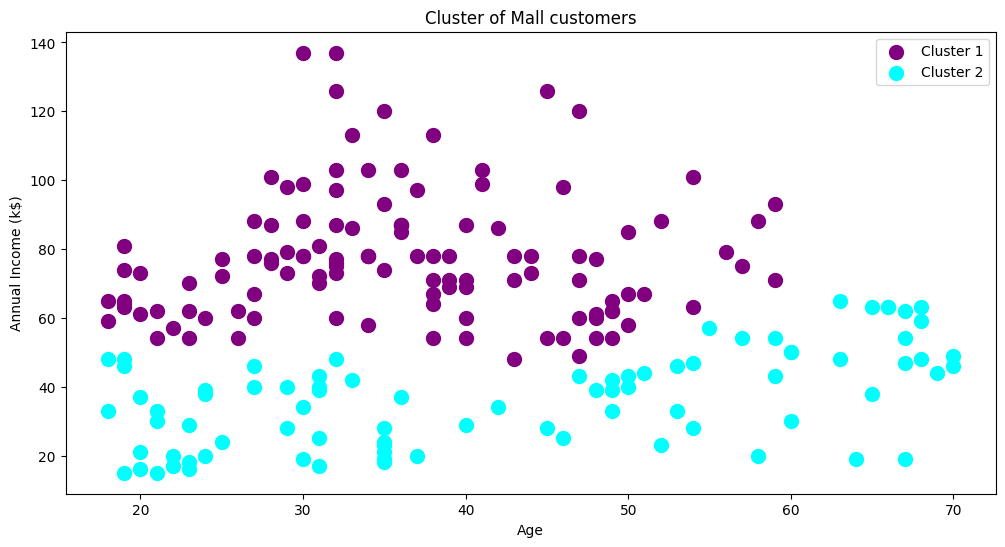

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df1['Age'],df1['Annual Income (k$)'],s=100,color='purple',label='Cluster 1')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],s=100,color='cyan',label='Cluster 2')
plt.title('Cluster of Mall customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/basic1.csv')
df.head()

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1


In [ ]:
df.isna().sum()

,0
x,0
y,0
color,0


In [ ]:
df.dtypes

,0
x,float64
y,float64
color,int64


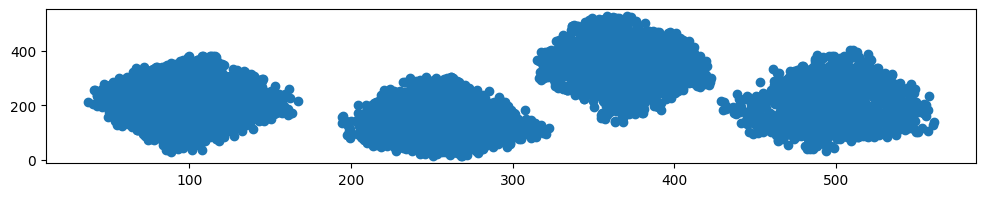

In [ ]:
plt.figure(figsize=(12,2))
plt.scatter(df['x'],df['y'])
plt.show()

In [ ]:
dfsubset=df.loc[:,['x','y']]
dfsubset.head()

,x,y
0,79.408289,152.834424
1,98.046263,186.910700
2,240.578979,48.473684
3,109.687183,277.945769
4,249.626082,229.753352


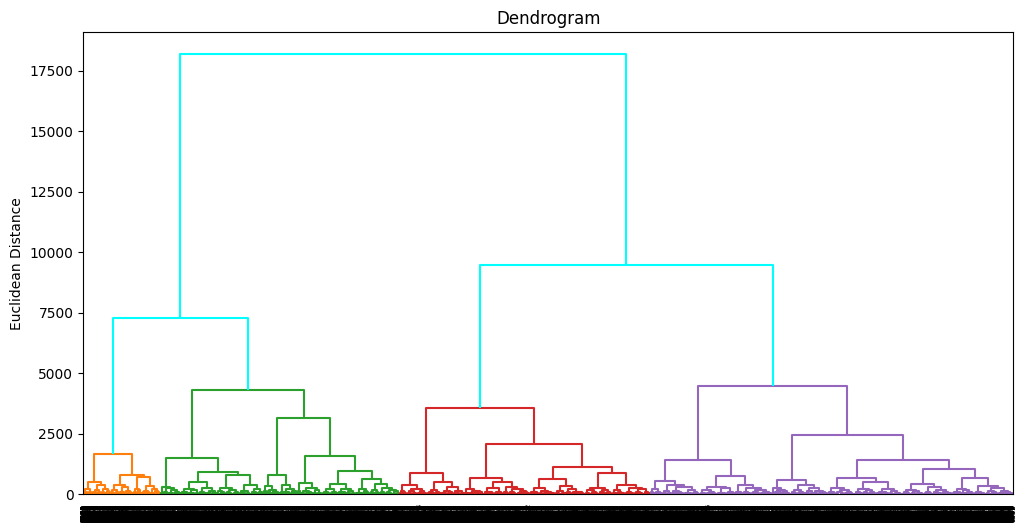

In [ ]:
plt.figure(figsize=(12,6))
dendrogram=sch.dendrogram(sch.linkage(dfsubset,method='ward'),above_threshold_color='cyan',color_threshold=7000)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
cluster=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
cl=cluster.fit_predict(dfsubset)
cl

array([0, 0, 2, ..., 1, 1, 1])

In [ ]:
silhouette_score(dfsubset,cl)

np.float64(0.5310865349882902)

In [ ]:
dfsubset['cluster']=cl
dfsubset.head()

,x,y,cluster
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,2
3,109.687183,277.945769,0
4,249.626082,229.753352,2


In [ ]:
df1=dfsubset[dfsubset['cluster']==0]
df2=dfsubset[dfsubset['cluster']==1]
df3=dfsubset[dfsubset['cluster']==2]
df4=dfsubset[dfsubset['cluster']==3]

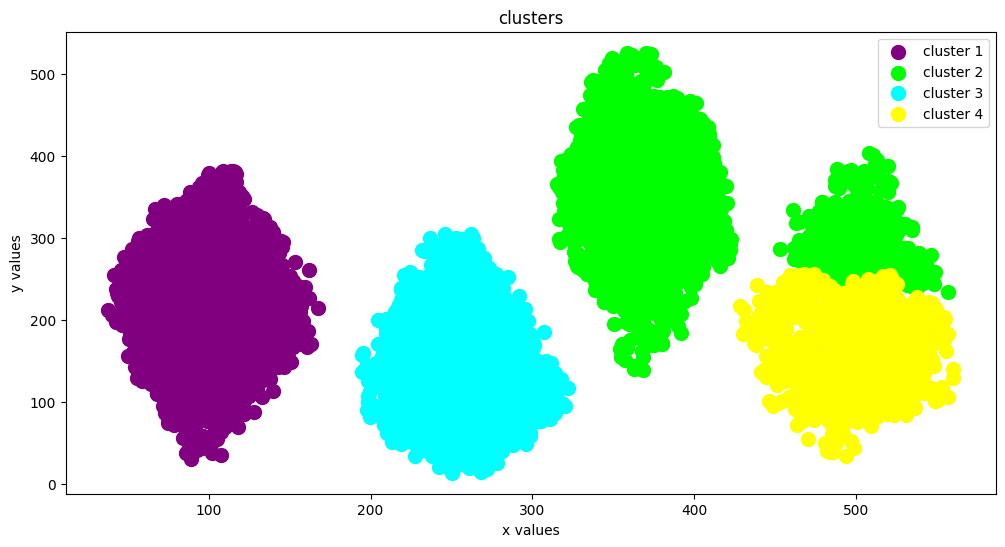

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df1['x'],df1['y'],s=100,c='purple',label='cluster 1')
plt.scatter(df2['x'],df2['y'],s=100,c='lime',label='cluster 2')
plt.scatter(df3['x'],df3['y'],s=100,c='cyan',label='cluster 3')
plt.scatter(df4['x'],df4['y'],s=100,c='yellow',label='cluster 4')
plt.legend()
plt.title('clusters')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

# **Example 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
df.shape

(178, 13)

In [ ]:
df.dtypes

,0
Alcohol,float64
Malic_Acid,float64
Ash,float64
Ash_Alcanity,float64
Magnesium,int64
Total_Phenols,float64
Flavanoids,float64
Nonflavanoid_Phenols,float64
Proanthocyanins,float64
Color_Intensity,float64


In [ ]:
dfsubset=df.loc[:,['Alcohol','Color_Intensity']]
dfsubset.head()

,Alcohol,Color_Intensity
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,7.80
4,13.24,4.32


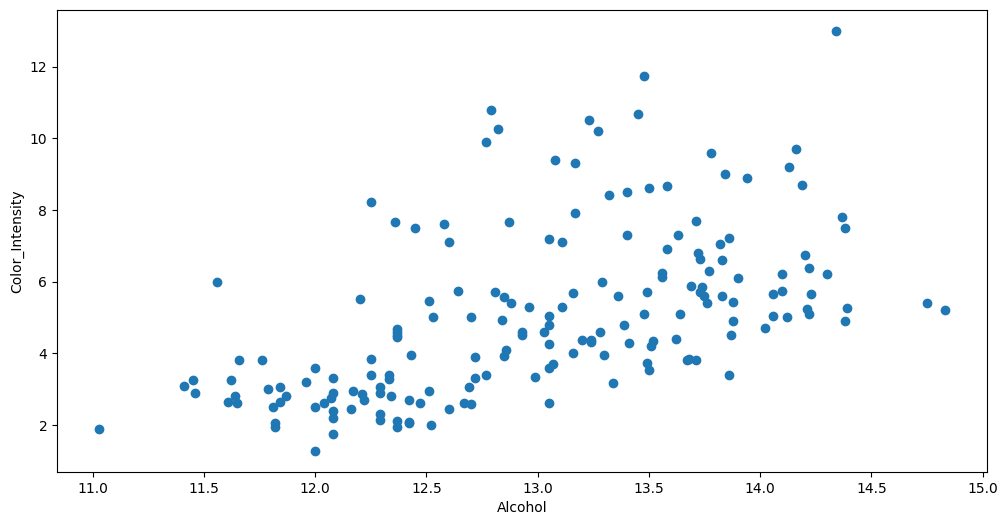

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(dfsubset['Alcohol'],dfsubset['Color_Intensity'])
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

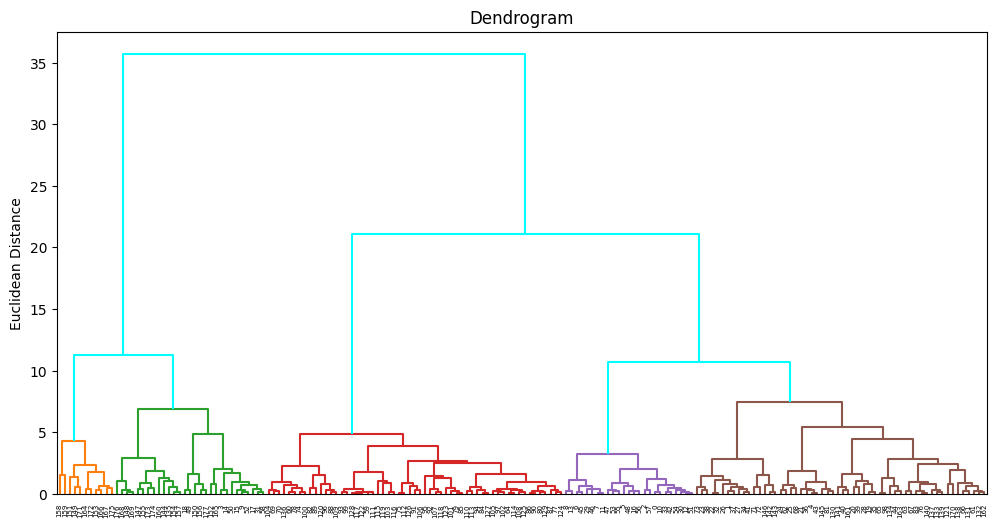

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Dendrogram')
dendrogram=sch.dendrogram(sch.linkage(dfsubset,method='ward'),above_threshold_color='cyan',color_threshold=10)
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
cluster=AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean')
cl=cluster.fit_predict(df)
cl

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 4, 4, 0,
       2, 2, 0, 0, 0, 4, 2, 3, 0, 4, 4, 2, 0, 2, 4, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 4, 4, 3, 0, 4, 0, 4, 0, 2, 4, 4, 0, 4, 2, 2, 4, 0,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 0, 2, 4, 4, 4, 4, 4, 2, 4, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 4, 0, 0, 2, 2, 2, 4, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [ ]:
silhouette_score(df,cl)

np.float64(0.5074843044233789)

In [ ]:
dfsubset['cluster']=cl
dfsubset.head()

,Alcohol,Color_Intensity,cluster
0,14.23,5.64,3
1,13.20,4.38,3
2,13.16,5.68,3
3,14.37,7.80,1
4,13.24,4.32,0


In [ ]:
df1=dfsubset[dfsubset['cluster']==0]
df2=dfsubset[dfsubset['cluster']==1]
df3=dfsubset[dfsubset['cluster']==2]
df4=dfsubset[dfsubset['cluster']==3]
df5=dfsubset[dfsubset['cluster']==4]

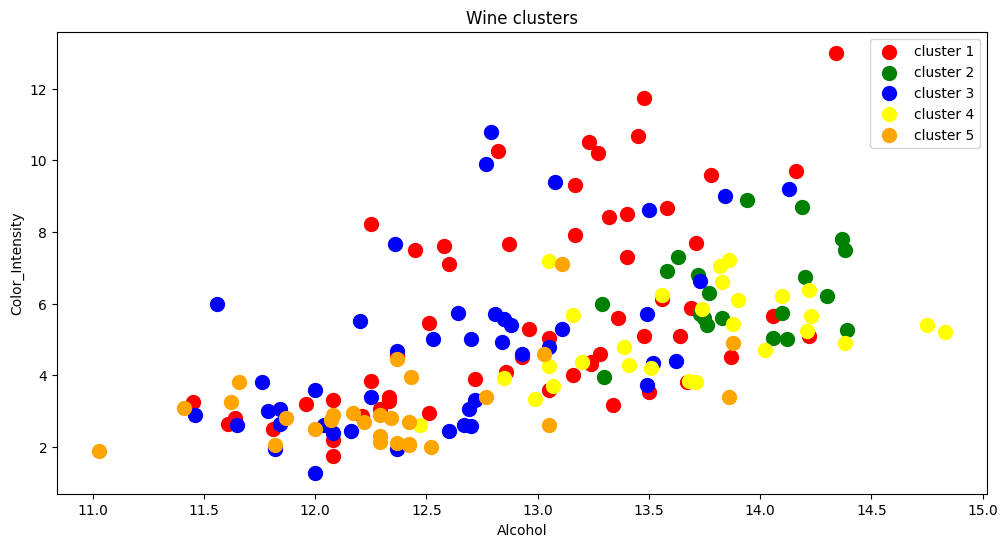

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df1['Alcohol'],df1['Color_Intensity'],s=100,c='red',label='cluster 1')
plt.scatter(df2['Alcohol'],df2['Color_Intensity'],s=100,c='green',label='cluster 2')
plt.scatter(df3['Alcohol'],df3['Color_Intensity'],s=100,c='blue',label='cluster 3')
plt.scatter(df4['Alcohol'],df4['Color_Intensity'],s=100,c='yellow',label='cluster 4')
plt.scatter(df5['Alcohol'],df5['Color_Intensity'],s=100,c='orange',label='cluster 5')
plt.title('Wine clusters')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.legend()
plt.show()

# **Example 4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
df.shape

(50, 5)

In [ ]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
dfsubset=df.loc[:,['R&D Spend','Profit']]
dfsubset.head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [ ]:
scaler=StandardScaler()
for i in dfsubset:
  dfsubset[[i]]=scaler.fit_transform(dfsubset[[i]])
dfsubset.head()

,R&D Spend,Profit
0,2.016411,2.011203
1,1.955860,1.999430
2,1.754364,1.980842
3,1.554784,1.776627
4,1.504937,1.357740


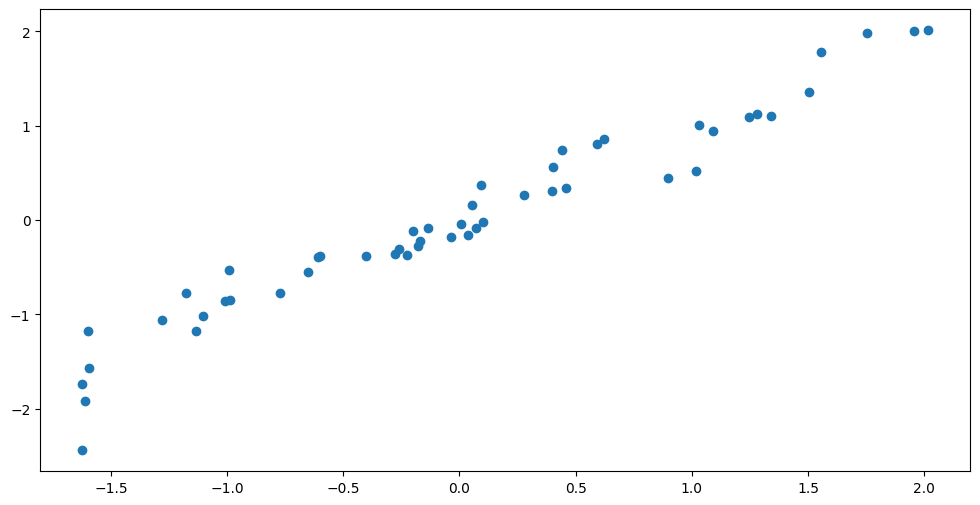

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(dfsubset['R&D Spend'],dfsubset['Profit'])
plt.show()

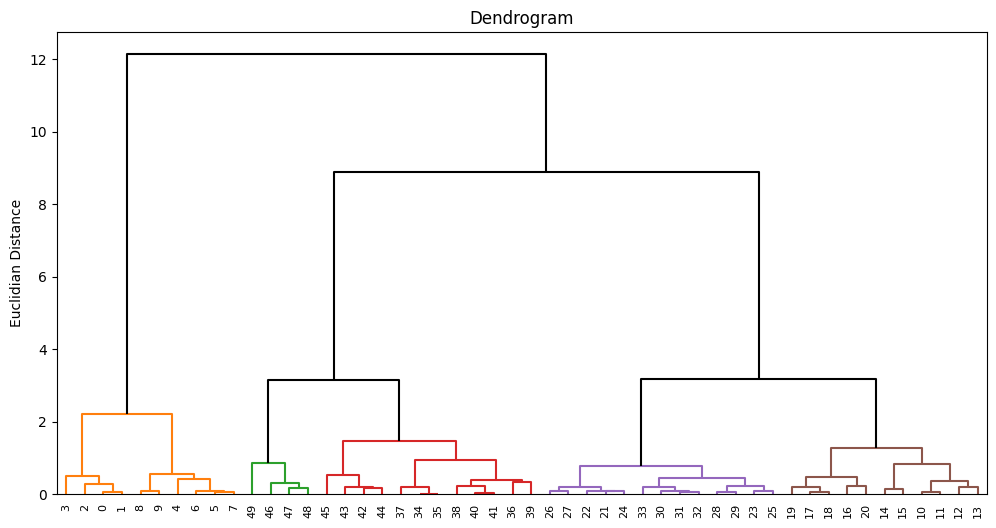

In [ ]:
plt.figure(figsize=(12,6))
dendrogram=sch.dendrogram(sch.linkage(dfsubset,method='ward'),above_threshold_color='black',color_threshold=3)
plt.ylabel('Euclidian Distance')
plt.title('Dendrogram')
plt.show()

In [ ]:
cluster=AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean')
cl=cluster.fit_predict(dfsubset)
cl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4])

In [ ]:
silhouette_score(dfsubset,cl)

np.float64(0.604418222584238)

In [ ]:
dfsubset['cluster']=cl
dfsubset.head()

,R&D Spend,Profit,cluster
0,2.016411,2.011203,0
1,1.955860,1.999430,0
2,1.754364,1.980842,0
3,1.554784,1.776627,0
4,1.504937,1.357740,0


In [ ]:
df1=dfsubset[dfsubset['cluster']==0]
df2=dfsubset[dfsubset['cluster']==1]
df3=dfsubset[dfsubset['cluster']==2]
df4=dfsubset[dfsubset['cluster']==3]
df5=dfsubset[dfsubset['cluster']==4]

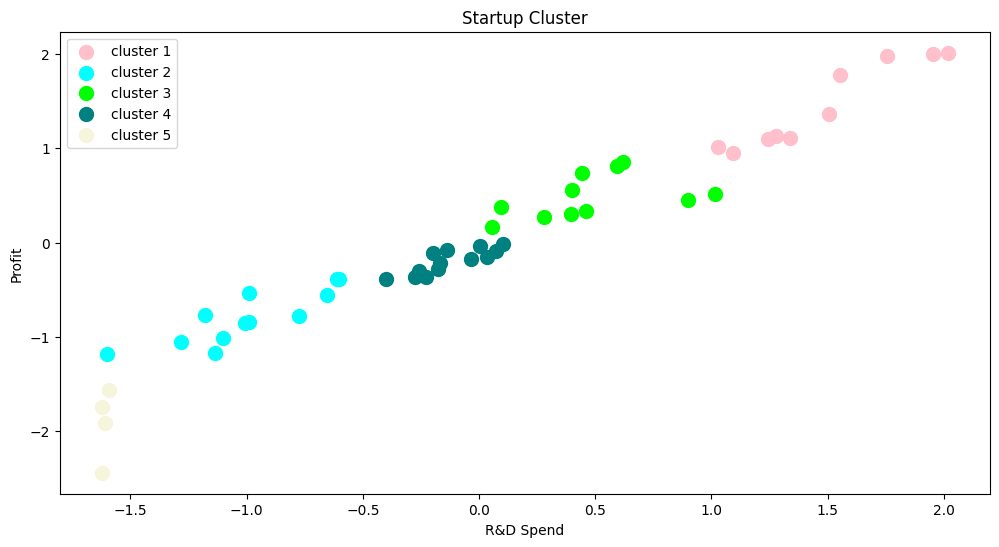

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df1['R&D Spend'],df1['Profit'],s=100,c='pink',label='cluster 1')
plt.scatter(df2['R&D Spend'],df2['Profit'],s=100,c='cyan',label='cluster 2')
plt.scatter(df3['R&D Spend'],df3['Profit'],s=100,c='lime',label='cluster 3')
plt.scatter(df4['R&D Spend'],df4['Profit'],s=100,c='teal',label='cluster 4')
plt.scatter(df5['R&D Spend'],df5['Profit'],s=100,c='beige',label='cluster 5')
plt.title('Startup Cluster')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()